In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image  
from sklearn import tree

# Get Data

In [ ]:
# read from snowflake
USER = os.getenv('USER')
PASSWORD = os.getenv('SNOW_PWD')
ACCOUNT = os.getenv('ACCOUNT')
WAREHOUSE = os.getenv('WAREHOUSE')
DATABASE = os.getenv('DATABASE')
SCHEMA = os.getenv('SCHEMA')
TABLE = os.getenv('TABLE')


url = URL(
    account = ACCOUNT,
    user = USER,
    password = PASSWORD,
    database = DATABASE,
    schema = SCHEMA,
    warehouse = WAREHOUSE
)
engine = create_engine(url)
connection = engine.connect()
query = 'select * from ' + DATABASE + "." + SCHEMA + "." + TABLE
df = pd.read_sql(query, connection)

variable = "score"
y = df[variable]
x = df.drop(columns=[variable])

# clean data
enc = OrdinalEncoder()
x = enc.fit_transform(x)
y = enc.fit_transform(np.array(y).reshape(-1, 1))

# split
train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=42)

# Build Model

In [20]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_set,train_labels)

#Predict the response for test dataset
y_pred = clf.predict(test_set)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.7


[Text(0.41114354395604397, 0.9705882352941176, 'X[4] <= 124.5\ngini = 0.455\nsamples = 538\nvalue = [350, 188]'),
 Text(0.1353021978021978, 0.9117647058823529, 'X[2] <= 27.0\ngini = 0.297\nsamples = 325\nvalue = [266, 59]'),
 Text(0.04395604395604396, 0.8529411764705882, 'X[2] <= 9.1\ngini = 0.043\nsamples = 90\nvalue = [88, 2]'),
 Text(0.02197802197802198, 0.7941176470588235, 'X[3] <= 28.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.01098901098901099, 0.7352941176470589, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.03296703296703297, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06593406593406594, 0.7941176470588235, 'X[6] <= 0.675\ngini = 0.023\nsamples = 86\nvalue = [85, 1]'),
 Text(0.054945054945054944, 0.7352941176470589, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.07692307692307693, 0.7352941176470589, 'X[6] <= 0.705\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.06593406593406594, 0.6764705882352942, 'gini = 0.0\nsamp

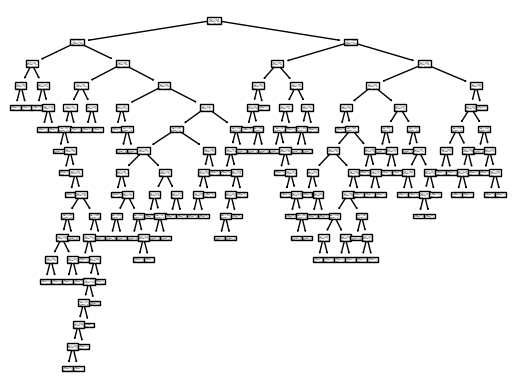

In [21]:
tree.plot_tree(clf)